In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
# Load and Inspect the dataset
# The dataset contains credit card transaction information
# 'Class' is a record of whether the transation was fraudelent (1) or not (0)
# 'Time' is the no. seconds between the transaction and the first transaction in the dataset
# 'Amount' is the value of the transaction
# The other variables are the results of a PCA transformation

df = pd.read_csv("creditcard.csv")  # Loading the dataset from the same destination as the notebook
df.info()  # Getting data information on all the columns of the dataset 
df.describe()  # getting numerical information for all columns of the dataset

# No null values in any columns so no need to clean data with regards to this
# Columns all in acceptable data type (all floats or ints)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
# Checking for duplicate rows - we find 1081
print(df.duplicated(subset = None, keep = 'first').sum())

1081


In [4]:
# Removing duplicate rows
df = df.drop_duplicates()

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Time, dtype: float64


<AxesSubplot:>

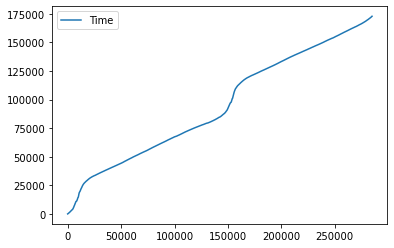

In [5]:
# Plotting our dataframe by row and we see it is in chronological order
print(df['Time'].head())
df.plot(y = 'Time')

In [6]:
# Randomising the order of the rows so not chronological to remove any bias from collecting data in this order
# Do so by sampling entire dataset randomly
# Means each k-fold split will have share of frauds

# sampling entire dataset randomly
df = df.sample(frac=1, random_state = 42)

# Also reset index to new order
df = df.reset_index(drop = True)

# Displaying first 5 rows of randomised - see successful
df['Time'].head()

0     69195.0
1     80769.0
2     41182.0
3       666.0
4    160870.0
Name: Time, dtype: float64

In [7]:
# Counting no. fraudulent (1) vs non-fraudulent (0) transactions
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

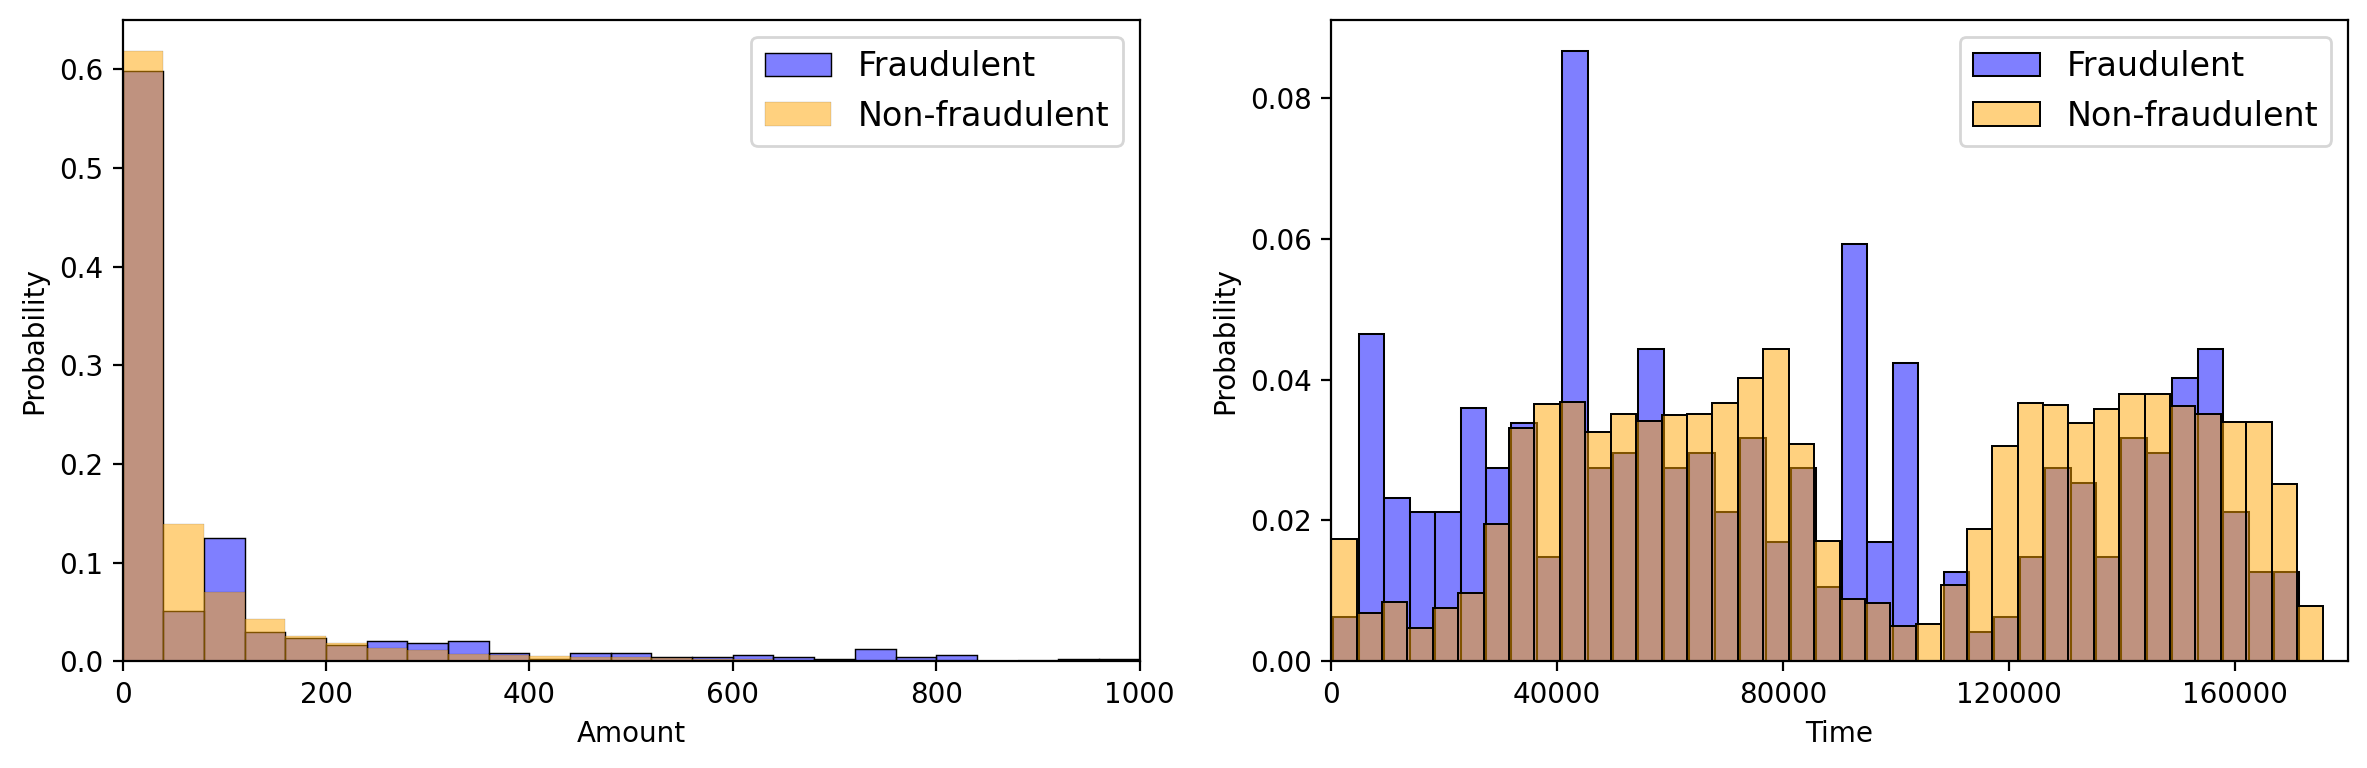

In [8]:
# Visualise the distributions for time and amount for fraudulent transations vs. non-fraudulent see if obvious difference
# EDA - looking at distribution of variables for fraudulent and non-fraudulent transactions
# For Amount see similar +ve skew but peak 80-120
# for Time see higher probability earlier and certain peaks as well as bimodal behaviour likely due to day vs night
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4), dpi = 200)
plt.rcParams.update({'font.size': 12})

# Maybe normalised historgram better, KDE makes look like -ve values
sns.histplot(ax = ax[0], data = df.loc[df['Class'] == 1], x = 'Amount', stat = 'probability', color = 'blue', alpha = 0.5, binwidth = 40, edgecolor = 'black', label = 'Fraudulent')
sns.histplot(ax = ax[0], data = df.loc[df['Class'] == 0], x = 'Amount', stat = 'probability', color = 'orange', alpha = 0.5, binwidth = 40, edgecolor = 'black', label = 'Non-fraudulent')
ax[0].set_xlabel('Amount')
ax[0].set_xlim((0, 1000))
ax[0].legend()

sns.histplot(ax = ax[1], data = df.loc[df['Class'] == 1], x = 'Time', stat = 'probability', color = 'blue', alpha = 0.5, binwidth = 4500, edgecolor = 'black', label = 'Fraudulent')
sns.histplot(ax = ax[1], data = df.loc[df['Class'] == 0], x = 'Time', stat = 'probability', color = 'orange', alpha = 0.5, binwidth = 4500, edgecolor = 'black', label = 'Non-fraudulent')
ax[1].set_xlabel('Time')
ax[1].set_xlim((0, 180000))
ax[1].set_xticks(np.arange(0, 180000, 40000))
ax[1].legend()

fig.tight_layout()

# Should not use the time variable as it is as feature as it is time since first transaction in the dataset (which we don't
# explicitly know the date of - specification says it is transactions in September so possible it is 1st of September at 
# midnight but no way to know)
# If we knew time explicitly we could have perhaps looked at if time/date elements affecrs whether transaction is fraudulent
# by looking at DoW or time of day as new features - this is not possible with time since unknown starting point as we have

In [9]:
# Can reduce no. PCA variables as most variance in the data should be held in the first variables - meaning contain most of
# the information about the data

# Calculating explained variance for PCs to decide which to keep - see 90% and 80% in first 20 and 15 respectively
PC_columns = []
for i in range(28):
    PC_columns.append("V" + str(i+1))
    
EV = (df[PC_columns].var()/sum(df[PC_columns].var())).to_frame(name = 'EV')
EV_cumsum = EV.cumsum()

EV['cumsum'] = (EV_cumsum)

EV

,EV,cumsum
V1,0.124532,0.124532
V2,0.088986,0.213519
V3,0.074694,0.288213
V4,0.065630,0.353844
V5,0.062225,0.416069
V6,0.058218,0.474287
V7,0.049460,0.523746
V8,0.045621,0.569367
V9,0.039383,0.608750
V10,0.038023,0.646773


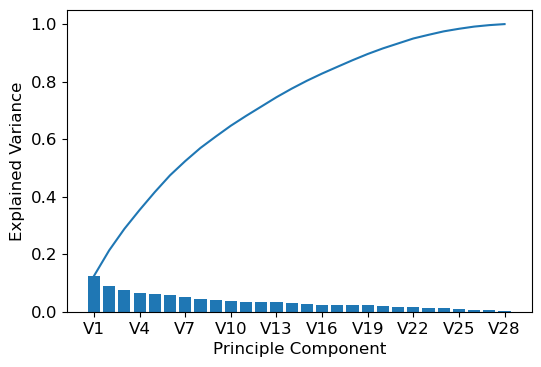

In [10]:
# Visualising EV of PCs
plt.figure(figsize = (6, 4), dpi = 100)
plt.bar(x = EV.index, height = EV['EV'])
plt.plot(EV['cumsum'])
plt.xticks(PC_columns[::3])
plt.ylabel('Explained Variance')
plt.xlabel('Principle Component')
plt.show()

In [11]:
# Columns may need standardising - PCA don't as variables should be standardised prior to PCA transformation (typically use
# difference to mean/standard deviation [z-score] - this checks out as mean very close to 0 for all columns)
# Standardize (z-values) of amount column to make similar to PCs - don't expect it to have an effect
df['Amount Scaled'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
df.describe() 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount Scaled
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,2.837260e+05
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667,1.998024e-13
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796,1.000000e+00
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000,-3.533262e-01
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000,-3.309620e-01
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000,-2.654666e-01
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000,-4.378080e-02
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000,1.022474e+02


In [12]:
# Looking at correlation between important features as expected PCs don't correlate
# However correlation to 'Amount' and 'Class' vary quite a lot - correlation stronger than 'Amount' with 'Class' so keep all
df[PC_columns[0:15] + ['Amount Scaled', 'Class']].corr()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,Amount Scaled,Class
V1,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.230105,-0.094486
V2,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,-0.533428,0.084624
V3,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.212410,-0.182322
V4,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.099514,0.129326
V5,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.387685,-0.087812
V6,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.216389,-0.043915
V7,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,0.400408,-0.172347
V8,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.104662,0.033068
V9,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.044123,-0.094021
V10,0.000815,0.000620,-0.009632,0.002753,-0.006050,-0.002180,-0.013617,0.000481,-0.012613,1.000000,0.000844,-0.006942,0.001379,0.000168,-0.002293,-0.102255,-0.206971


In [13]:
# Selecting Features and splitting dataset into train and validate - use train in K-fold validation so need validation set
# that won't be used in K-fold cross validation
# needed to randomise dataset to do k-fold validation as well
# Use default 75-25 split for train-val data
# Refer to training data as 'mod' as using to train and test model originally
# Val data used to compare best versions of models at end as unseen data - want to check not overfitting to data

features = PC_columns[0:15] + ['Amount Scaled']
X_mod, X_val, Y_mod, Y_val = train_test_split(df[features], df['Class'], random_state = 42)

In [14]:
# Setting up metrics and variables for k-fold validation and importing models
# Aim is to find best version of each model - use k-fold to get more accurate idea of performance
# Can't just use accuracy as measure of success as highly balanced towards negatives (0.172% positives),
# simply classifying every transaction as non-fraudulent would produce very high accuracy (99.8%)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier   # tree gives tree models
from sklearn import svm
from xgboost import XGBClassifier

# Specifying we want 4 splits
N = 4
kf = KFold(n_splits = N)  


In [15]:
# Running decision tree model with different parameters


# Creating array of depths to test decision tree over to find best version
tree_depth = np.arange(2,11,1)

# Arrays to store measures for each depth and k-fold validation
tree_FP = np.zeros((len(tree_depth), N))
tree_FR = np.zeros((len(tree_depth), N))
tree_NP = np.zeros((len(tree_depth), N))
tree_NR = np.zeros((len(tree_depth), N))
tree_A = np.zeros((len(tree_depth), N))

# Counters for depth and k-fold loops
n = 0 
m = 0  

for i in tree_depth:  # run for each tree depth we want to test

    decision_tree_model = DecisionTreeClassifier(max_depth = i, random_state = 42)  # defining instance of decision tree
    
    # Creating our splits to train model on - creates 4 pairs of test and train indices to select test and train pair in each 
    # iteration - and iterate over each of these pairs
    
    for train_index, test_index in kf.split(X_mod):
        
        X_train, X_test = np.array(X_mod)[train_index], np.array(X_mod)[test_index]  # Have to turn into arrays to select using index
        Y_train, Y_test = np.array(Y_mod)[train_index], np.array(Y_mod)[test_index]
              
        decision_tree_model.fit(X_train, Y_train)  # fit model on training data
        preds = decision_tree_model.predict(X_test)  # making predictions
        
        CM = confusion_matrix(Y_test, preds)
        
        # Recording measure values
        tree_FP[n, m] = CM[1,1]/(CM[1,1] + CM[0,1])
        tree_FR[n, m] = CM[1,1]/(CM[1,1] + CM[1,0])
        tree_NP[n, m] = CM[0,0]/(CM[0,0] + CM[1,0])
        tree_NR[n, m] = CM[0,0]/(CM[0,0] + CM[0,1])
        tree_A[n, m] = (CM[0,0] + CM[1,1])/CM.sum()
        
        
        m = m + 1  # updating counter for next k-fold batch
    n = n + 1  # updating counter for next tree depth
    m = 0   # resetting k-fold counter to 0 for new depth
        
# Arrays to store averaged measures in
tree_FP_avg = np.zeros(len(tree_depth))
tree_FR_avg = np.zeros(len(tree_depth))
tree_NP_avg = np.zeros(len(tree_depth))
tree_NR_avg = np.zeros(len(tree_depth))
tree_A_avg = np.zeros(len(tree_depth))
        
for i in range(len(tree_depth)):
    
    tree_FP_avg[i] = np.mean(tree_FP[i])
    tree_FR_avg[i] = np.mean(tree_FR[i])
    tree_NP_avg[i] = np.mean(tree_NP[i])
    tree_NR_avg[i] = np.mean(tree_NR[i])
    tree_A_avg[i] = np.mean(tree_A[i])
    
# Recall gives probability prediction matches actual class (rows)
# Precision gives probability class matches prediction (columns)
# For us the recall & precision of fraudulent transactions (class = 1) is particularly important - 
# if predict all non-fraudulent accuracy will be high and so will precision and recall for class = 0 but model actually
# useless - needs to find frauds
# Is it worse to falsely predict frauds or not catch frauds?

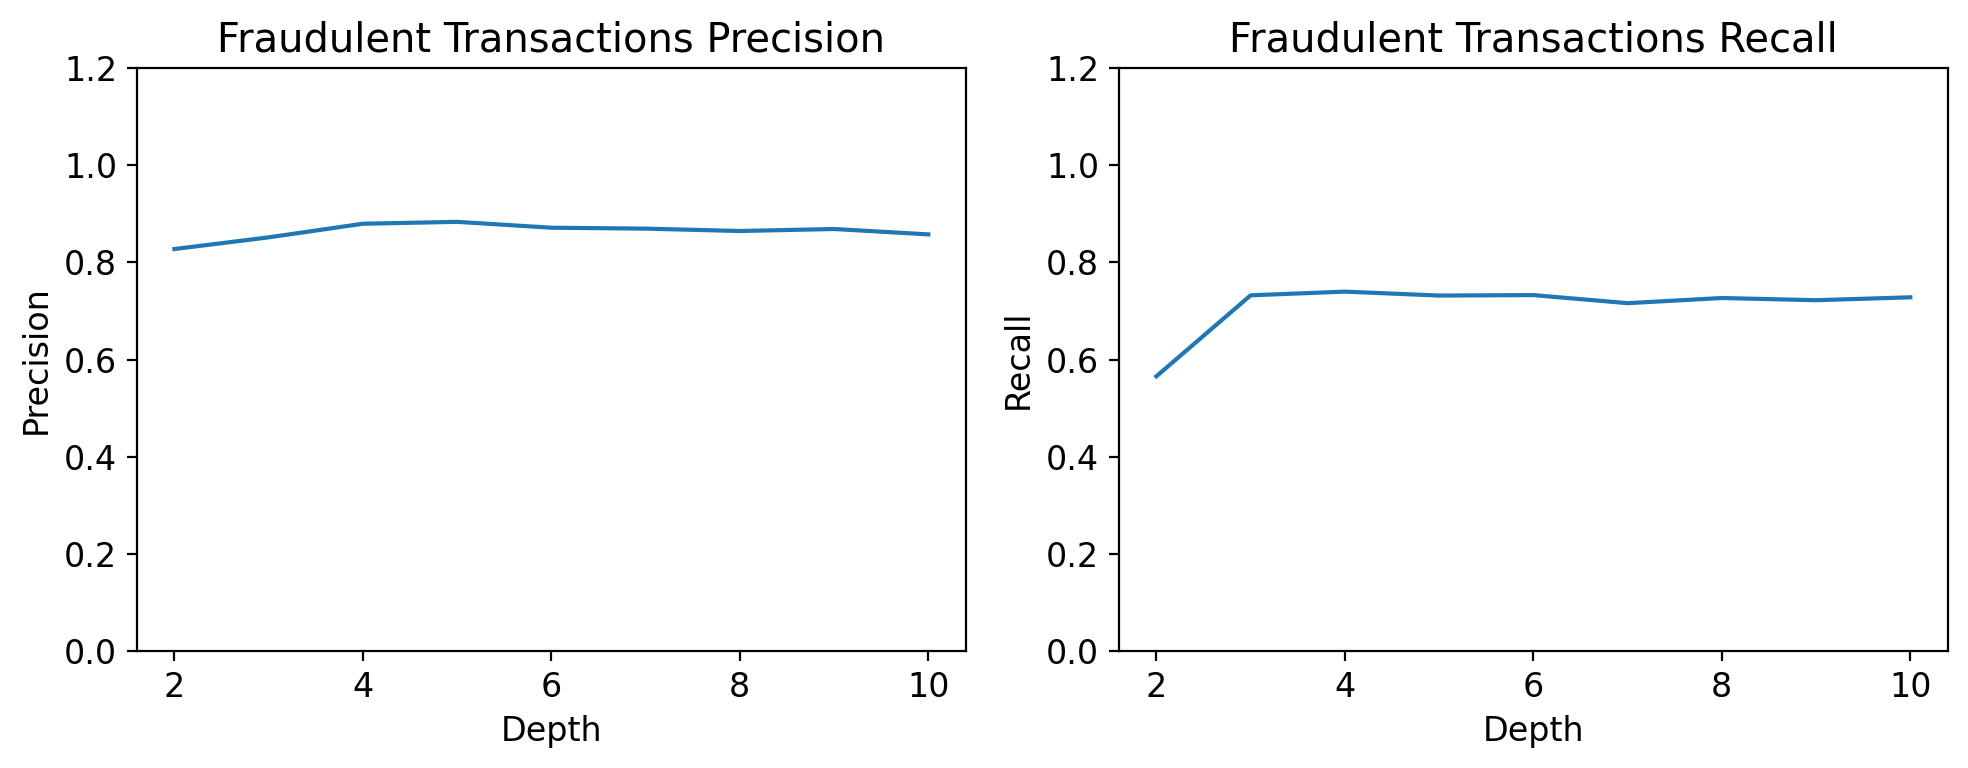

In [16]:
# Visualising the results of the decision tree model - illustrates pointless-ness of accuracy and metrics for non-fraudulent 
# transactions - on balance depth = 6 probably best balance
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4), dpi = 200) 

ax[0].plot(tree_depth, tree_FP_avg)
ax[0].set_title("Fraudulent Transactions Precision")
ax[0].set_xlabel("Depth")
ax[0].set_ylabel("Precision")
ax[0].set_ylim((0, 1.2))

ax[1].plot(tree_depth, tree_FR_avg)
ax[1].set_title("Fraudulent Transactions Recall")
ax[1].set_xlabel("Depth")
ax[1].set_ylabel("Recall")
ax[1].set_ylim((0, 1.2))

# ax[2].plot(tree_depth, tree_NP_avg)
# ax[2].set_title("Non-fraudulent Transactions Precision")
# ax[2].set_xlabel("Depth")
# ax[2].set_ylabel("Precision")
# ax[2].set_ylim((0, 1.2))
# 
# ax[3].plot(tree_depth, tree_NR_avg)
# ax[3].set_title("Non-fraudulent Transactions Recall")
# ax[3].set_xlabel("Depth")
# ax[3].set_ylabel("Recall")
# ax[3].set_ylim((0, 1.2))
# 
# ax[4].plot(tree_depth, tree_A_avg)
# ax[4].set_title("Accuracy")
# ax[4].set_xlabel("Depth")
# ax[4].set_ylabel("Accuracy")
# ax[4].set_ylim((0, 1.2))

plt.tight_layout()
plt.show()

In [17]:
print(tree_depth) 
print(tree_FP_avg)
print(tree_FR_avg)

[ 2  3  4  5  6  7  8  9 10]
[0.82712585 0.85120503 0.87918302 0.88305861 0.8710055  0.86912737
 0.864234   0.86835874 0.85728472]
[0.56558055 0.73204405 0.73962682 0.73154252 0.73250361 0.71590676
 0.72650392 0.72196385 0.72794675]


In [18]:
# f1-score for top 2 depths
depth_4_f1 = 2*((tree_FP_avg[3] * tree_FR_avg[3])/(tree_FP_avg[3] + tree_FR_avg[3]))
depth_5_f1 = 2*((tree_FP_avg[4] * tree_FR_avg[4])/(tree_FP_avg[4] + tree_FR_avg[4]))

print(depth_4_f1)
print(depth_5_f1)
      

0.8001913363589268
0.7957730562961515


In [19]:
# Creating and testing XGBoost model - ensemble decision tree model that uses gradient boost so should offer improvement over
# simple decision tree model

from xgboost import XGBClassifier

N_estimators = np.arange(20, 120, 20)

# Arrays to store measures for each depth and k-fold validation
XgBoost_FP = np.zeros((len(N_estimators), N))
XgBoost_FR = np.zeros((len(N_estimators), N))
XgBoost_NP = np.zeros((len(N_estimators), N))
XgBoost_NR = np.zeros((len(N_estimators), N))
XgBoost_A = np.zeros((len(N_estimators), N))

# Counters for n_estimators and k-fold loops
n = 0 
m = 0 

for i in range(len(N_estimators)):
    
    # Set max depth to 4 as saw for decision trees this is best depth and beyond performance got worse
    xgboost_model = XGBClassifier(use_label_encoder=False, n_estimators = N_estimators[i], max_depth = 4, verbosity = 0)

    for train_index, test_index in kf.split(X_mod):  # Produces same splits each time so will be using same splits as for DT
            
            X_train, X_test = np.array(X_mod)[train_index], np.array(X_mod)[test_index]  # Have to turn into arrays to select using index
            Y_train, Y_test = np.array(Y_mod)[train_index], np.array(Y_mod)[test_index]
                  
            xgboost_model.fit(X_train, Y_train)  # fit model on training data
            preds = xgboost_model.predict(X_test)  # making predictions
            
            CM = confusion_matrix(Y_test, preds)
            
            # Recording measure values
            XgBoost_FP[n, m] = CM[1,1]/(CM[1,1] + CM[0,1])
            XgBoost_FR[n, m] = CM[1,1]/(CM[1,1] + CM[1,0])
            XgBoost_NP[n, m] = CM[0,0]/(CM[0,0] + CM[1,0])
            XgBoost_NR[n, m] = CM[0,0]/(CM[0,0] + CM[0,1])
            XgBoost_A[n, m] = (CM[0,0] + CM[1,1])/CM.sum()
            
            m = m + 1  # updating counter for next k-fold batch
    n = n + 1  # updating counter for next estimators
    m = 0   # resetting k-fold counter to 0 for new depth

  

In [20]:
# Arrays to store averaged measures in
XgBoost_FP_avg = np.zeros(len(N_estimators))
XgBoost_FR_avg = np.zeros(len(N_estimators))
XgBoost_NP_avg = np.zeros(len(N_estimators))
XgBoost_NR_avg = np.zeros(len(N_estimators))
XgBoost_A_avg = np.zeros(len(N_estimators))
        
for i in range(len(N_estimators)):
    
    XgBoost_FP_avg[i] = np.mean(XgBoost_FP[i])
    XgBoost_FR_avg[i] = np.mean(XgBoost_FR[i])
    XgBoost_NP_avg[i] = np.mean(XgBoost_NP[i])
    XgBoost_NR_avg[i] = np.mean(XgBoost_NR[i])
    XgBoost_A_avg[i] = np.mean(XgBoost_A[i])

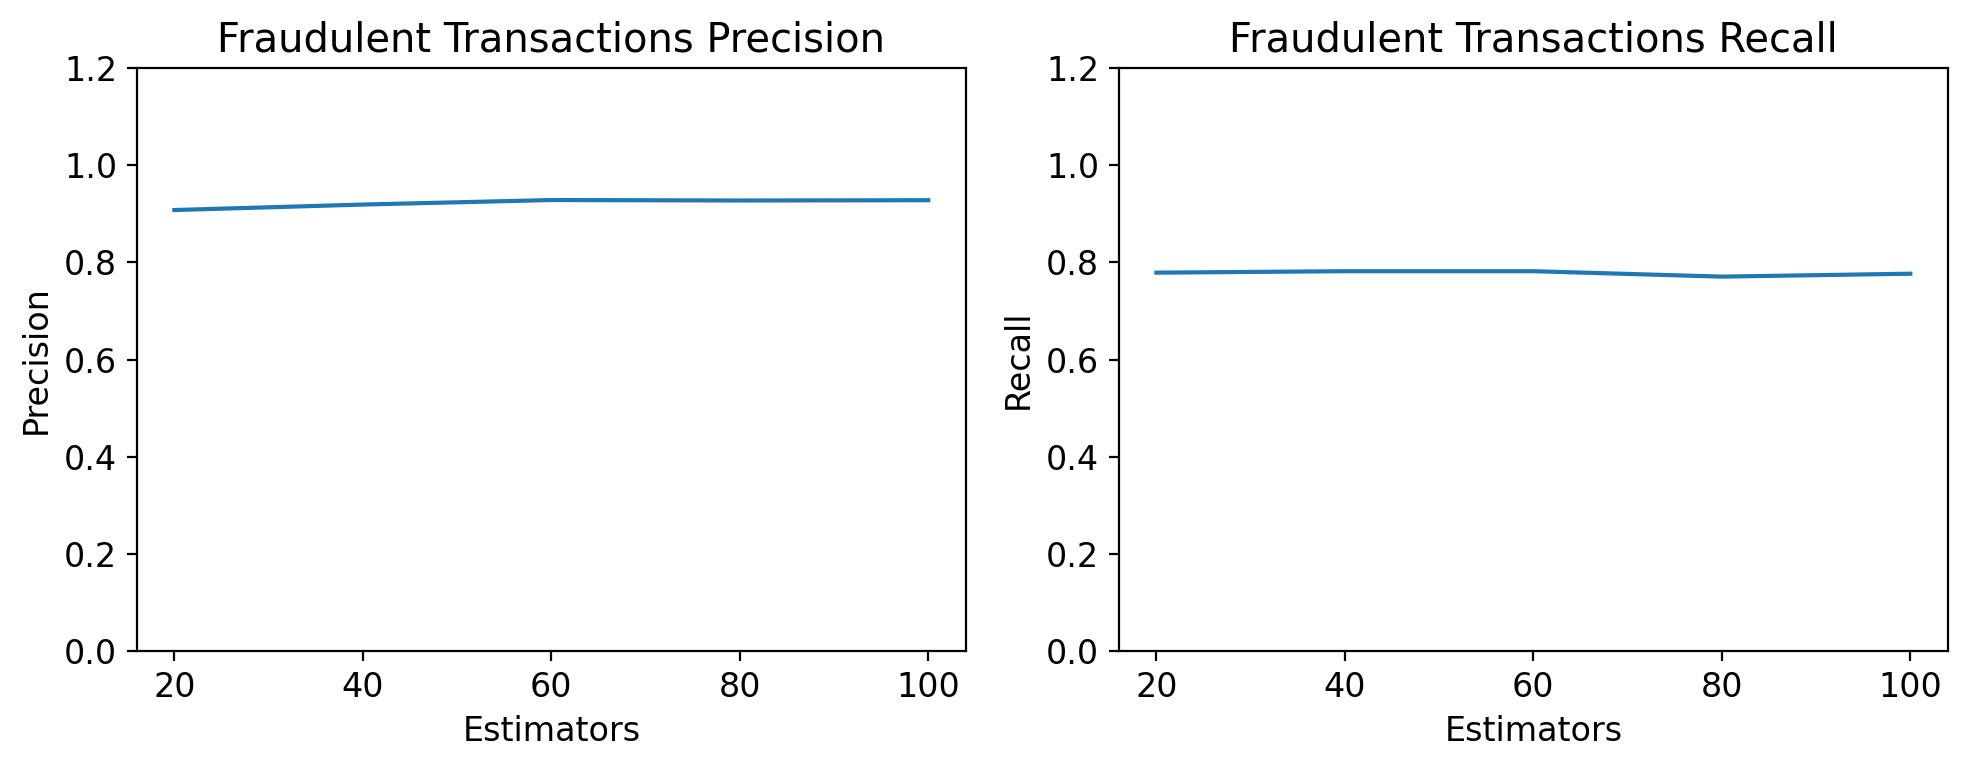

In [21]:
# Visualising the results of the XgBoost model
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4), dpi = 200) 

ax[0].plot(N_estimators, XgBoost_FP_avg)
ax[0].set_title("Fraudulent Transactions Precision")
ax[0].set_xlabel("Estimators")
ax[0].set_ylabel("Precision")
ax[0].set_ylim((0, 1.2))

ax[1].plot(N_estimators, XgBoost_FR_avg)
ax[1].set_title("Fraudulent Transactions Recall")
ax[1].set_xlabel("Estimators")
ax[1].set_ylabel("Recall")
ax[1].set_ylim((0, 1.2))

# ax[2].plot(N_estimators, XgBoost_NP_avg)
# ax[2].set_title("Non-fraudulent Transactions Precision")
# ax[2].set_xlabel("Estimators")
# ax[2].set_ylabel("Precision")
# ax[2].set_ylim((0, 1.2))
# 
# ax[3].plot(N_estimators, XgBoost_NR_avg)
# ax[3].set_title("Non-fraudulent Transactions Recall")
# ax[3].set_xlabel("Estimators")
# ax[3].set_ylabel("Recall")
# ax[3].set_ylim((0, 1.2))
# 
# ax[4].plot(N_estimators, XgBoost_A_avg)
# ax[4].set_title("Accuracy")
# ax[4].set_xlabel("Estimators")
# ax[4].set_ylabel("Accuracy")
# ax[4].set_ylim((0, 1.2))

plt.tight_layout()
plt.show()

In [22]:
# Printing scores
print(N_estimators) 
print(XgBoost_FP_avg)
print(XgBoost_FR_avg)

print(2*((XgBoost_FP_avg * XgBoost_FR_avg)/(XgBoost_FP_avg + XgBoost_FR_avg)))


[ 20  40  60  80 100]
[0.90735169 0.91860237 0.92791365 0.92694894 0.92751389]
[0.77862286 0.78161506 0.78161506 0.77046873 0.77645164]
[0.83807287 0.84459015 0.84850436 0.8414961  0.84528668]


In [23]:
# Trying a support vector machine model - use Gaussian kernel by default to not limited to be linear seperator
# Adjust gamma which controls how points grouped together, lower means further away points can be grouped & simpler boundaries
# Also adjust class weightings - as fraudulent cases more important we can weight these more as the svm learns
# this made things very slow, look at tol and max_iter to reduce time
# "Balanced" weighting

Gamma = np.arange(0.002, 0.012, 0.002)

# Arrays to store measures for each depth and k-fold validation
svm_FP = np.zeros((len(Gamma), N))
svm_FR = np.zeros((len(Gamma), N))
svm_NP = np.zeros((len(Gamma), N))
svm_NR = np.zeros((len(Gamma), N))
svm_A = np.zeros((len(Gamma), N))

# Counters for n_estimators and k-fold loops
n = 0 
m = 0 

for i in range(len(Gamma)):
    
    print(Gamma[i])
    # Setting parameters for svm, trying class weighting - default is way too strong
    svm_model = svm.SVC(gamma=Gamma[i], kernel = 'rbf')

    for train_index, test_index in kf.split(X_mod):  # Produces same splits each time so will be using same splits as for DT
            
            X_train, X_test = np.array(X_mod)[train_index], np.array(X_mod)[test_index]  # Have to turn into arrays to select using index
            Y_train, Y_test = np.array(Y_mod)[train_index], np.array(Y_mod)[test_index]
                  
            svm_model.fit(X_train, Y_train)  # fit model on training data
            preds = svm_model.predict(X_test)  # making predictions
            
            CM = confusion_matrix(Y_test, preds)
                        
            # Recording measure values
            svm_FP[n, m] = CM[1,1]/(CM[1,1] + CM[0,1])
            svm_FR[n, m] = CM[1,1]/(CM[1,1] + CM[1,0])
            svm_NP[n, m] = CM[0,0]/(CM[0,0] + CM[1,0])
            svm_NR[n, m] = CM[0,0]/(CM[0,0] + CM[0,1])
            svm_A[n, m] = (CM[0,0] + CM[1,1])/CM.sum()
            
            m = m + 1  # updating counter for next k-fold batch
    n = n + 1  # updating counter for next Gamma
    m = 0   # resetting k-fold counter to 0 for new depth

0.002
0.004
0.006
0.008
0.01


In [24]:
# Arrays to store averaged measures in
svm_FP_avg = np.zeros(len(Gamma))
svm_FR_avg = np.zeros(len(Gamma))
svm_NP_avg = np.zeros(len(Gamma))
svm_NR_avg = np.zeros(len(Gamma))
svm_A_avg = np.zeros(len(Gamma))
        
for i in range(len(Gamma)):
    
    svm_FP_avg[i] = np.mean(svm_FP[i])
    svm_FR_avg[i] = np.mean(svm_FR[i])
    svm_NP_avg[i] = np.mean(svm_NP[i])
    svm_NR_avg[i] = np.mean(svm_NR[i])
    svm_A_avg[i] = np.mean(svm_A[i])

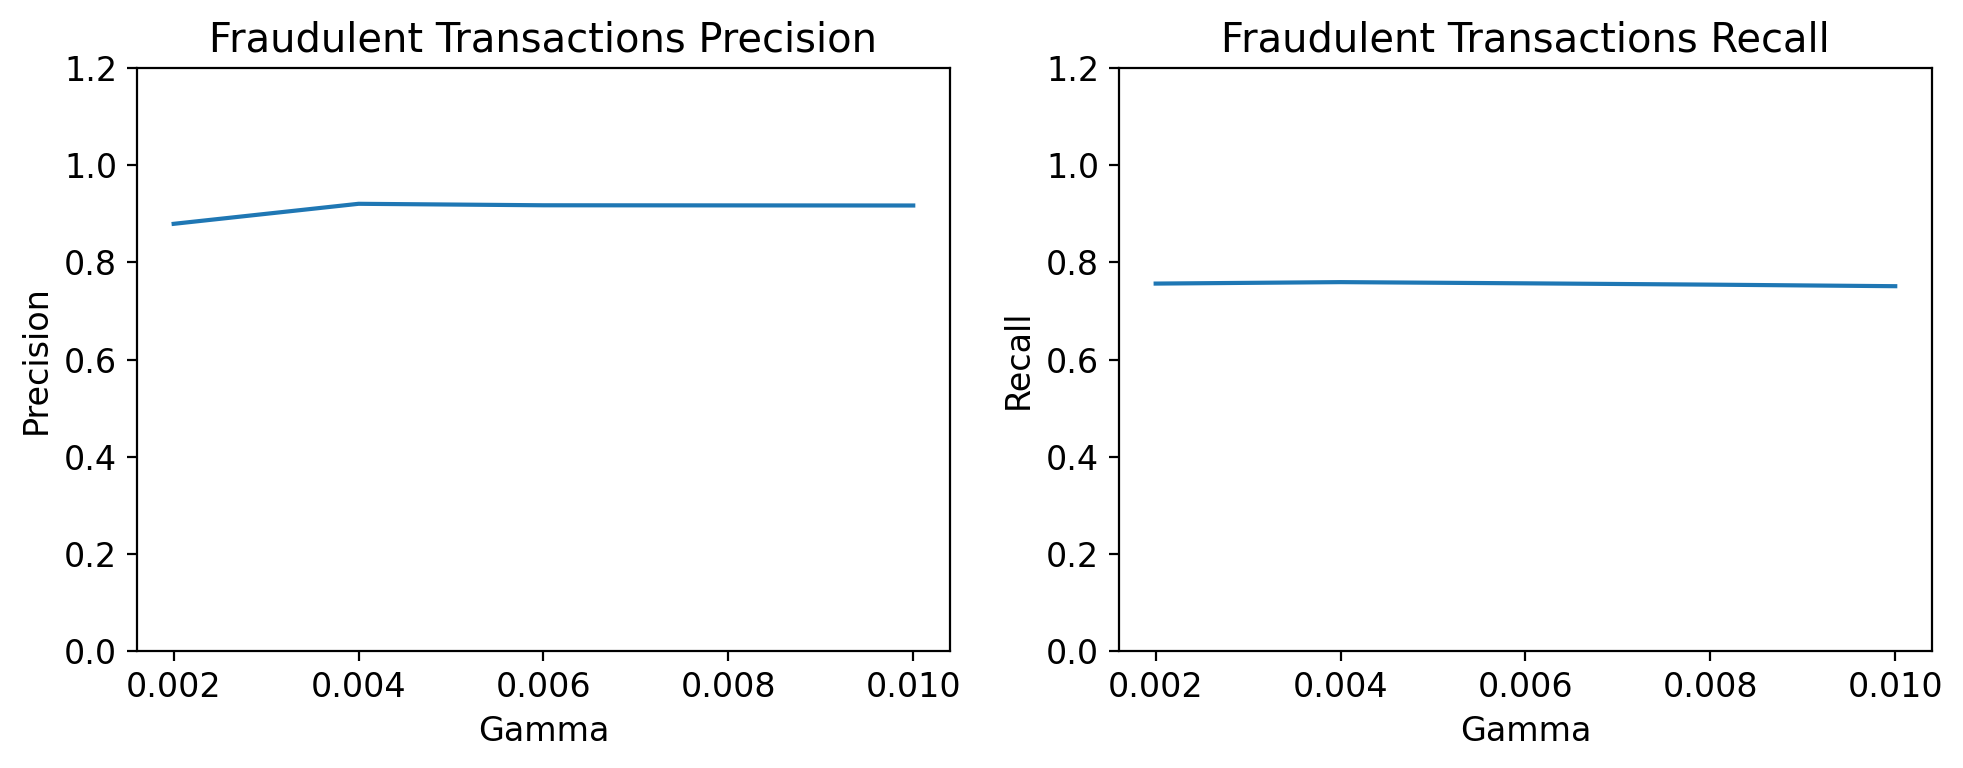

In [25]:
# Visualising the results of the svm model
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4), dpi = 200) 

ax[0].plot(Gamma, svm_FP_avg)
ax[0].set_title("Fraudulent Transactions Precision")
ax[0].set_xlabel("Gamma")
ax[0].set_ylabel("Precision")
ax[0].set_ylim((0, 1.2))

ax[1].plot(Gamma, svm_FR_avg)
ax[1].set_title("Fraudulent Transactions Recall")
ax[1].set_xlabel("Gamma")
ax[1].set_ylabel("Recall")
ax[1].set_ylim((0, 1.2))

# ax[2].plot(Gamma, svm_NP_avg)
# ax[2].set_title("Non-fraudulent Transactions Precision")
# ax[2].set_xlabel("Gamma")
# ax[2].set_ylabel("Precision")
# ax[2].set_ylim((0, 1.2))
# 
# ax[3].plot(Gamma, svm_NR_avg)
# ax[3].set_title("Non-fraudulent Transactions Recall")
# ax[3].set_xlabel("Gamma")
# ax[3].set_ylabel("Recall")
# ax[3].set_ylim((0, 1.2))
# 
# ax[4].plot(Gamma, svm_A_avg)
# ax[4].set_title("Accuracy")
# ax[4].set_xlabel("Gamma")
# ax[4].set_ylabel("Accuracy")
# ax[4].set_ylim((0, 1.2))

plt.tight_layout()
plt.show()

In [26]:
# Printing scores
print(Gamma) 
print(svm_FP_avg)
print(svm_FR_avg)

print(2*((svm_FP_avg * svm_FR_avg)/(svm_FP_avg + svm_FR_avg)))

[0.002 0.004 0.006 0.008 0.01 ]
[0.87897224 0.9201746  0.91712582 0.91689443 0.91666829]
[0.75616942 0.75916162 0.75668638 0.7539982  0.75079308]
[0.81295945 0.83194924 0.82921682 0.8275059  0.82548024]


In [27]:
# Now relearning and making predictions on unseen data for best version of each model
# We learn on all of X_mod and Y_mod as we trained across all values in these earlier as we used k-fold and so average of 
# k-fold results show best performance across X_mod and Y_mod for parameters


# Our optimal models for each type
decision_tree_model_opt = DecisionTreeClassifier(max_depth = 4, random_state = 42)
xgboost_model_opt = XGBClassifier(use_label_encoder=False, n_estimators = 30, max_depth = 4, verbosity = 0)
svm_model_opt = svm.SVC(gamma = 0.04, kernel = 'rbf')

# fit models on modelling data
decision_tree_model_opt.fit(X_mod, Y_mod)
xgboost_model_opt.fit(X_mod, Y_mod)
svm_model_opt.fit(X_mod, Y_mod)  

# making predictions
decision_tree_preds = decision_tree_model_opt.predict(X_val)
xgboost_preds = xgboost_model_opt.predict(X_val)
svm_preds = svm_model_opt.predict(X_val)  

# Calculating confusion matrices
CM_dt = confusion_matrix(Y_val, decision_tree_preds)
CM_xg = confusion_matrix(Y_val, xgboost_preds)
CM_svm = confusion_matrix(Y_val, svm_preds)

print("Decision Tree")
print(CM_dt)
print("XgBoost")
print(CM_xg)
print("SVM")
print(CM_svm)
            


Decision Tree
[[70814     7]
 [   31    80]]
XgBoost
[[70814     7]
 [   23    88]]
SVM
[[70819     2]
 [   36    75]]


In [28]:
# Classification Report for each model
CR_dt = classification_report(Y_val, decision_tree_preds)
CR_xg = classification_report(Y_val, xgboost_preds)
CR_svm = classification_report(Y_val, svm_preds)

print("Decision Tree")
print(CR_dt)
print("XgBoost")
print(CR_xg)
print("SVM")
print(CR_svm)


Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70821
           1       0.92      0.72      0.81       111

    accuracy                           1.00     70932
   macro avg       0.96      0.86      0.90     70932
weighted avg       1.00      1.00      1.00     70932

XgBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70821
           1       0.93      0.79      0.85       111

    accuracy                           1.00     70932
   macro avg       0.96      0.90      0.93     70932
weighted avg       1.00      1.00      1.00     70932

SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70821
           1       0.97      0.68      0.80       111

    accuracy                           1.00     70932
   macro avg       0.99      0.84      0.90     70932
weighted avg       1.00      1.00      1.00     

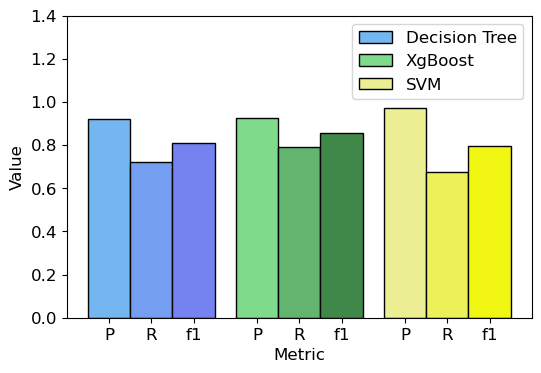

In [32]:
# Comparing Precision and Recall for fraudulent transactions and overall accuracy for each model

dt_FP = CM_dt[1,1]/(CM_dt[1,1] + CM_dt[0,1])
dt_FR = CM_dt[1,1]/(CM_dt[1,1] + CM_dt[1,0])
dt_A = (CM_dt[0,0] + CM_dt[1,1])/CM_dt.sum()
dt_f1 = 2*((dt_FP * dt_FR)/(dt_FP + dt_FR))

xg_FP = CM_xg[1,1]/(CM_xg[1,1] + CM_xg[0,1])
xg_FR = CM_xg[1,1]/(CM_xg[1,1] + CM_xg[1,0])
xg_A = (CM_xg[0,0] + CM_xg[1,1])/CM_xg.sum()
xg_f1 = 2*((xg_FP * xg_FR)/(xg_FP + xg_FR))

svm_FP = CM_svm[1,1]/(CM_svm[1,1] + CM_svm[0,1])
svm_FR = CM_svm[1,1]/(CM_svm[1,1] + CM_svm[1,0])
svm_A = (CM_svm[0,0] + CM_svm[1,1])/CM_svm.sum()
svm_f1 = 2*((svm_FP * svm_FR)/(svm_FP + svm_FR))


plt.figure(figsize = (6, 4), dpi = 100)

plt.bar(x = [0, 1, 2], height = [dt_FP, dt_FR, dt_f1], width = 1, color = ['#74b6f0', '#749ff0', '#7483f0'], edgecolor = 'black', label = 'Decision Tree')
plt.bar(x = [3.5, 4.5, 5.5], height = [xg_FP, xg_FR, xg_f1], width = 1, color = ['#7fda8b', '#63b46e', '#3f8849'], edgecolor = 'black', tick_label = ['P', 'R', 'A'], label = 'XgBoost')
plt.bar(x = [7, 8, 9], height = [svm_FP, svm_FR, svm_f1], width = 1, color = ['#ebee92', '#edf159', '#f1f712'], edgecolor = 'black', tick_label = ['P', 'R', 'A'], label = 'SVM')
plt.bar(x = [0, 1, 2, 3.5, 4.5, 5.5, 7, 8, 9], height = [0, 0, 0, 0, 0, 0, 0, 0, 0], tick_label = ['P', 'R', 'f1','P', 'R', 'f1','P', 'R', 'f1'])
plt.ylim((0, 1.4))
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend()

plt.show()

# MAKE BAR CHART OF CM MATRIX RESULTS

In [35]:
# Printing final scores
print(dt_FP, xg_FP, svm_FP)
print(dt_FR, xg_FR, svm_FR)
print(dt_f1, xg_f1, svm_f1)
print(dt_A, xg_A, svm_A)

0.9195402298850575 0.9263157894736842 0.974025974025974
0.7207207207207207 0.7927927927927928 0.6756756756756757
0.8080808080808081 0.8543689320388349 0.797872340425532
0.999464275644279 0.9995770597191677 0.999464275644279
